In [ ]:
!pip install diffusers transformers torch torchvision matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install diffusers transformers torch accelerate


In [ ]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image

# Load the pre-trained Stable Diffusion model
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")  # Move model to GPU if available



The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
def generate_image_variation(input_image, prompt, strength=0.75, guidance_scale=7.5, num_steps=50):
    # Resize and convert input image to the expected format
    input_image = input_image.resize((512, 512))  # Resize to match Stable Diffusion's input size
    input_image = input_image.convert("RGB")

    # Generate image based on the prompt
    output = pipe(
        prompt=prompt,
        image=input_image,
        strength=strength,
        guidance_scale=guidance_scale,
        num_inference_steps=num_steps
    )

    return output.images[0]  # Return the first generated image

# Load an example input image
input_image = Image.open("/content/cat.jpg").convert("RGB")  # Replace with your actual image path

# Define different text prompts
prompts = [
    "watercolor painting",
    "pixel art",
    "in the style of Salvador Dalí",
    "in the style of Van Gogh",
    "underwater scene"
]

# Experiment with different parameter settings
parameter_sets = [
    {"strength": 0.5, "guidance_scale": 7.5, "num_steps": 30},  # Low transformation
    {"strength": 0.75, "guidance_scale": 10, "num_steps": 50},  # Balanced
    {"strength": 0.9, "guidance_scale": 12, "num_steps": 75}   # High transformation
]

# Generate images for each prompt with different settings
for i, prompt in enumerate(prompts):
    for j, params in enumerate(parameter_sets):
        img = generate_image_variation(
            input_image,
            prompt,
            strength=params["strength"],
            guidance_scale=params["guidance_scale"],
            num_steps=params["num_steps"]
        )
        img.save(f"output_{i}_{j}_{prompt.replace(' ', '_')}.png")
        print(f"Generated image for '{prompt}' with settings {params}")

print("All images generated successfully!")


  0%|          | 0/15 [00:00<?, ?it/s]

Generated image for 'watercolor painting' with settings {'strength': 0.5, 'guidance_scale': 7.5, 'num_steps': 30}


  0%|          | 0/37 [00:00<?, ?it/s]

Generated image for 'watercolor painting' with settings {'strength': 0.75, 'guidance_scale': 10, 'num_steps': 50}


  0%|          | 0/67 [00:00<?, ?it/s]

Generated image for 'watercolor painting' with settings {'strength': 0.9, 'guidance_scale': 12, 'num_steps': 75}


  0%|          | 0/15 [00:00<?, ?it/s]

Generated image for 'pixel art' with settings {'strength': 0.5, 'guidance_scale': 7.5, 'num_steps': 30}


  0%|          | 0/37 [00:00<?, ?it/s]

Generated image for 'pixel art' with settings {'strength': 0.75, 'guidance_scale': 10, 'num_steps': 50}


  0%|          | 0/67 [00:00<?, ?it/s]

Generated image for 'pixel art' with settings {'strength': 0.9, 'guidance_scale': 12, 'num_steps': 75}


  0%|          | 0/15 [00:00<?, ?it/s]

Generated image for 'in the style of Salvador Dalí' with settings {'strength': 0.5, 'guidance_scale': 7.5, 'num_steps': 30}


  0%|          | 0/37 [00:00<?, ?it/s]

Generated image for 'in the style of Salvador Dalí' with settings {'strength': 0.75, 'guidance_scale': 10, 'num_steps': 50}


  0%|          | 0/67 [00:00<?, ?it/s]

Generated image for 'in the style of Salvador Dalí' with settings {'strength': 0.9, 'guidance_scale': 12, 'num_steps': 75}


  0%|          | 0/15 [00:00<?, ?it/s]

Generated image for 'in the style of Van Gogh' with settings {'strength': 0.5, 'guidance_scale': 7.5, 'num_steps': 30}


  0%|          | 0/37 [00:00<?, ?it/s]

Generated image for 'in the style of Van Gogh' with settings {'strength': 0.75, 'guidance_scale': 10, 'num_steps': 50}


  0%|          | 0/67 [00:00<?, ?it/s]

Generated image for 'in the style of Van Gogh' with settings {'strength': 0.9, 'guidance_scale': 12, 'num_steps': 75}


  0%|          | 0/15 [00:00<?, ?it/s]

Generated image for 'underwater scene' with settings {'strength': 0.5, 'guidance_scale': 7.5, 'num_steps': 30}


  0%|          | 0/37 [00:00<?, ?it/s]

Generated image for 'underwater scene' with settings {'strength': 0.75, 'guidance_scale': 10, 'num_steps': 50}


  0%|          | 0/67 [00:00<?, ?it/s]

Generated image for 'underwater scene' with settings {'strength': 0.9, 'guidance_scale': 12, 'num_steps': 75}
All images generated successfully!


  0%|          | 0/15 [00:00<?, ?it/s]

Generated image for 'watercolor painting' with settings {'strength': 0.5, 'guidance_scale': 7.5, 'num_steps': 30}


  0%|          | 0/37 [00:00<?, ?it/s]

Generated image for 'watercolor painting' with settings {'strength': 0.75, 'guidance_scale': 10, 'num_steps': 50}


  0%|          | 0/67 [00:00<?, ?it/s]

Generated image for 'watercolor painting' with settings {'strength': 0.9, 'guidance_scale': 12, 'num_steps': 75}


  0%|          | 0/15 [00:00<?, ?it/s]

Generated image for 'pixel art' with settings {'strength': 0.5, 'guidance_scale': 7.5, 'num_steps': 30}


  0%|          | 0/37 [00:00<?, ?it/s]

Generated image for 'pixel art' with settings {'strength': 0.75, 'guidance_scale': 10, 'num_steps': 50}


  0%|          | 0/67 [00:00<?, ?it/s]

Generated image for 'pixel art' with settings {'strength': 0.9, 'guidance_scale': 12, 'num_steps': 75}


  0%|          | 0/15 [00:00<?, ?it/s]

Generated image for 'in the style of Salvador Dalí' with settings {'strength': 0.5, 'guidance_scale': 7.5, 'num_steps': 30}


  0%|          | 0/37 [00:00<?, ?it/s]

Generated image for 'in the style of Salvador Dalí' with settings {'strength': 0.75, 'guidance_scale': 10, 'num_steps': 50}


  0%|          | 0/67 [00:00<?, ?it/s]

Generated image for 'in the style of Salvador Dalí' with settings {'strength': 0.9, 'guidance_scale': 12, 'num_steps': 75}


  0%|          | 0/15 [00:00<?, ?it/s]

Generated image for 'in the style of Van Gogh' with settings {'strength': 0.5, 'guidance_scale': 7.5, 'num_steps': 30}


  0%|          | 0/37 [00:00<?, ?it/s]

Generated image for 'in the style of Van Gogh' with settings {'strength': 0.75, 'guidance_scale': 10, 'num_steps': 50}


  0%|          | 0/67 [00:00<?, ?it/s]

Generated image for 'in the style of Van Gogh' with settings {'strength': 0.9, 'guidance_scale': 12, 'num_steps': 75}


  0%|          | 0/15 [00:00<?, ?it/s]

Generated image for 'underwater scene' with settings {'strength': 0.5, 'guidance_scale': 7.5, 'num_steps': 30}


  0%|          | 0/37 [00:00<?, ?it/s]

Generated image for 'underwater scene' with settings {'strength': 0.75, 'guidance_scale': 10, 'num_steps': 50}


  0%|          | 0/67 [00:00<?, ?it/s]

Generated image for 'underwater scene' with settings {'strength': 0.9, 'guidance_scale': 12, 'num_steps': 75}


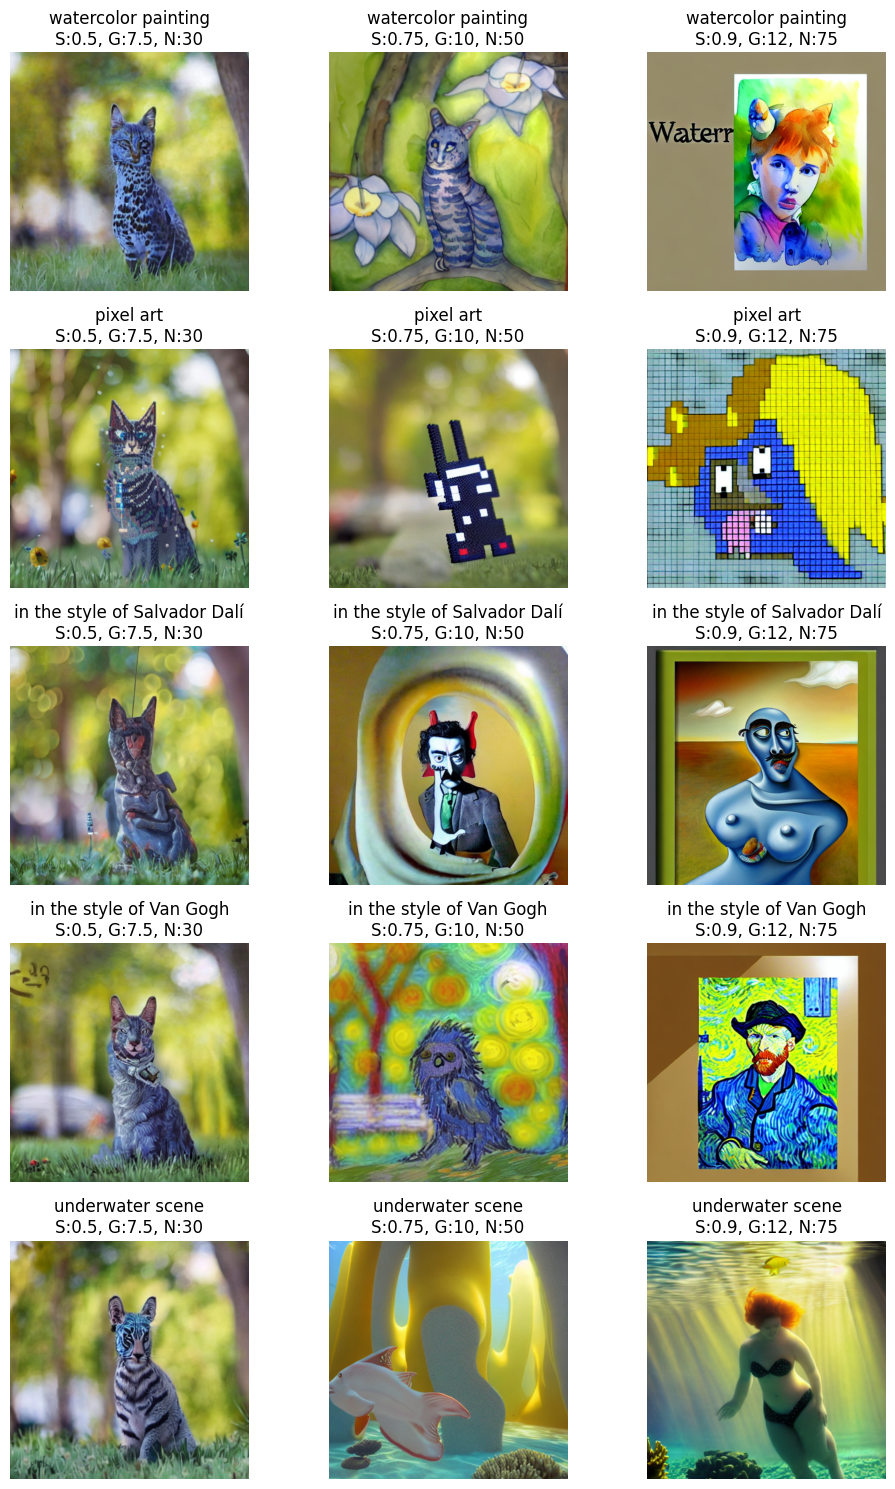

All images generated and displayed successfully!


In [ ]:
import matplotlib.pyplot as plt

# Generate images for each prompt with different settings and display them
fig, axes = plt.subplots(len(prompts), len(parameter_sets), figsize=(10, 15))

for i, prompt in enumerate(prompts):
    for j, params in enumerate(parameter_sets):
        img = generate_image_variation(
            input_image,
            prompt,
            strength=params["strength"],
            guidance_scale=params["guidance_scale"],
            num_steps=params["num_steps"]
        )

        # Save the generated image
        img.save(f"output_{i}_{j}_{prompt.replace(' ', '_')}.png")
        print(f"Generated image for '{prompt}' with settings {params}")

        # Display the image in the grid
        axes[i, j].imshow(img)
        axes[i, j].axis("off")
        axes[i, j].set_title(f"{prompt}\nS:{params['strength']}, G:{params['guidance_scale']}, N:{params['num_steps']}")

# Adjust layout and show the images
plt.tight_layout()
plt.show()

print("All images generated and displayed successfully!")
